Writing Strategy using Pinecode and using TradingView to perform the Backtest and Download the Data 


Importing the required Liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


Reading the Data from the csv

In [2]:
df = pd.read_csv('gold_data.csv')
df.head(8)

,Trade #,Type,Date/Time,Signal,Price USD,Position size (qty),Position size (value),Net P&L USD,Net P&L %,Run-up USD,Run-up %,Drawdown USD,Drawdown %,Cumulative P&L USD,Cumulative P&L %
0,1,Exit long,2024-10-23 09:27,Exit,2746.855,3.64,9994.8030,3.71,0.04,3.80,0.04,-0.38,0.00,3.71,0.04
1,1,Entry long,2024-10-23 09:26,Long,2745.825,3.64,9994.8030,3.71,0.04,3.80,0.04,-0.38,0.00,3.71,0.04
2,2,Exit long,2024-10-23 09:37,Exit,2746.365,3.64,9996.1316,0.60,0.01,1.75,0.02,-3.09,-0.03,4.31,0.04
3,2,Entry long,2024-10-23 09:30,Long,2746.190,3.64,9996.1316,0.60,0.01,1.75,0.02,-3.09,-0.03,4.31,0.04
4,3,Exit long,2024-10-23 09:48,Exit,2747.800,3.64,10000.5542,1.40,0.01,1.71,0.02,-0.27,0.00,5.71,0.06
5,3,Entry long,2024-10-23 09:47,Long,2747.405,3.64,10000.5542,1.40,0.01,1.71,0.02,-0.27,0.00,5.71,0.06
6,4,Exit long,2024-10-23 10:02,Exit,2749.315,3.63,9979.1604,0.82,0.01,1.42,0.01,-0.96,-0.01,6.53,0.07
7,4,Entry long,2024-10-23 09:58,Long,2749.080,3.63,9979.1604,0.82,0.01,1.42,0.01,-0.96,-0.01,6.53,0.07


In [3]:

value_counts = df['Position size (qty)'].value_counts()
total_trade = len(df)/2
# Print the results
print(value_counts)
print(total_trade)

Position size (qty)
3.62    1194
3.83    1124
3.58    1084
3.63    1082
3.59    1040
        ... 
3.17      20
3.00      20
2.97      16
2.99       4
2.96       4
Name: count, Length: 105, dtype: int64
17868.0


In [4]:

column_name = 'Position size (qty)'
row_counts_by_size = df[column_name].value_counts()
trade_counts_by_size = row_counts_by_size / 2
print("--- Trades Per Position Size---")
for position_size, trade_count in trade_counts_by_size.items():
            # int(trade_count) removes any .0
    print(f"position {position_size} | trade time {int(trade_count)}")

--- Trades Per Position Size---
position 3.62 | trade time 597
position 3.83 | trade time 562
position 3.58 | trade time 542
position 3.63 | trade time 541
position 3.59 | trade time 520
position 3.35 | trade time 441
position 3.84 | trade time 429
position 3.55 | trade time 423
position 3.56 | trade time 418
position 3.6 | trade time 413
position 3.53 | trade time 407
position 3.61 | trade time 394
position 3.7 | trade time 392
position 3.67 | trade time 371
position 3.85 | trade time 366
position 3.57 | trade time 357
position 3.66 | trade time 343
position 3.68 | trade time 327
position 3.64 | trade time 310
position 3.79 | trade time 306
position 3.82 | trade time 301
position 3.39 | trade time 262
position 3.8 | trade time 261
position 3.54 | trade time 242
position 3.69 | trade time 238
position 3.5 | trade time 235
position 3.47 | trade time 227
position 3.78 | trade time 226
position 3.86 | trade time 225
position 3.73 | trade time 222
position 3.52 | trade time 221
position 3.

In [5]:
df.tail(1)

,Trade #,Type,Date/Time,Signal,Price USD,Position size (qty),Position size (value),Net P&L USD,Net P&L %,Run-up USD,Run-up %,Drawdown USD,Drawdown %,Cumulative P&L USD,Cumulative P&L %
35735,17868,Entry long,2025-10-24 05:28,Long,4119.75,3.12,12853.62,0.5,0.0,3.09,0.02,-1.26,-0.01,2873.46,28.73


In [6]:
try:
    # --- 1. Isolate the returns for each trade ---
    # We filter for 'Exit long' so we only get one P&L entry per trade.
    # We use the column 'Net P&L USD' from your latest image.
    
    df['Type'] = df['Type'].str.strip()
    trade_returns = df[df['Type'] == 'Exit long']['Net P&L USD']

    # --- 2. Calculate the components ---
    
    # Rp: The average (mean) return per trade
    mean_return = trade_returns.mean()
    
    # σp: The standard deviation of the trade returns (this is the risk)
    std_dev_return = trade_returns.std()
    
    # Rf: The Risk-Free Rate. We'll assume 0 for per-trade calculations.
    risk_free_rate = 0

    # --- 3. Calculate the Sharpe Ratio ---
    # (Average Return) / (Standard Deviation of Returns)
    
    # We check if std_dev_return is zero to avoid dividing by zero
    if std_dev_return != 0:
        sharpe_ratio = (mean_return - risk_free_rate) / std_dev_return
    else:
        sharpe_ratio = float('inf') if mean_return > 0 else 0 # Handle no-risk case
        

    # --- 4. Print the results ---
    print("--- Sharpe Ratio Calculation (Per Trade) ---")
    print(f"Total trades analyzed: {len(trade_returns)}")
    print(f"Average Return per trade (Rp): {mean_return:.4f}")
    print(f"Risk (Std. Dev.) per trade (σp): {std_dev_return:.4f}")
    print(f"Assumed Risk-Free Rate (Rf): {risk_free_rate}")
    print("---------------------------------------------")
    print(f"Sharpe Ratio (per trade): {sharpe_ratio:.4f}")

except NameError:
    print("Error: The DataFrame 'df' doesn't seem to be loaded.")
    print("Please run the code from the first step to load your CSV file first.")
except KeyError as e:
    print(f"Error: Could not find a column: {e}")
    print("Please check your exact column names. We were looking for 'Type' and 'Net P&L USD'.")

--- Sharpe Ratio Calculation (Per Trade) ---
Total trades analyzed: 17868
Average Return per trade (Rp): 0.1609
Risk (Std. Dev.) per trade (σp): 7.3022
Assumed Risk-Free Rate (Rf): 0
---------------------------------------------
Sharpe Ratio (per trade): 0.0220


In [7]:

try:
        # --- 1. Ensure Date/Time column is a datetime object ---
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])

    # --- 2. Isolate exit rows (to count P&L only once) ---
    df['Type'] = df['Type'].str.strip()
    exits = df[df['Type'] == 'Exit long'].copy()
    
    # --- 3. Extract just the date (e.g., '2024-10-23') ---
    exits['date_only'] = exits['Date/Time'].dt.date

    # --- 4. Calculate total P&L for *each day* ---
    # This sums up all trade P&Ls for a given day
    daily_pnl = exits.groupby('date_only')['Net P&L USD'].sum()

    if daily_pnl.empty:
        print("Error: 'daily_pnl' is empty. Could not find any 'Exit long' trades.")
        print("Please check your 'Type' column.")
    
    elif len(daily_pnl) < 2:
        print(f"Error: Only found data for {len(daily_pnl)} day.")
        print("Cannot calculate standard deviation from a single data point.")

    else:
        # --- 5. Calculate daily stats ---
        avg_daily_return = daily_pnl.mean()
        std_dev_daily_return = daily_pnl.std() # This is your daily risk

        # --- 6. Calculate Annualized Sharpe Ratio ---
        risk_free_rate = 0.0 # (See explanation below)
        annualization_factor = np.sqrt(252) # (See explanation below)
        
        # Check for zero std deviation to avoid division error
        if std_dev_daily_return == 0:
            print("Error: Standard deviation of daily returns is 0.")
            print("This means all your daily P&L values were identical.")
            sharpe_ratio_annualized = np.inf # Technically infinite return for zero risk
        else:
            sharpe_ratio_annualized = (avg_daily_return - risk_free_rate) / std_dev_daily_return * annualization_factor

        # --- 7. Print the results ---
        print("--- Annualized Sharpe Ratio Calculation ---")
        print(f"Total trading days analyzed: {len(daily_pnl)}")
        print(f"Average Daily P&L: {avg_daily_return:.4f}")
        print(f"Risk (Std. Dev. of Daily P&L): {std_dev_daily_return:.4f}")
        print("---------------------------------------------")
        print(f"Annualized Sharpe Ratio: {sharpe_ratio_annualized/2:.4f}")


except NameError:
    print("Error: The DataFrame 'df' doesn't seem to be loaded.")
    print("Please run the code from the first step to load your CSV file first.")
except KeyError as e:
    print(f"Error: Could not find a column: {e}")
    print("Please check your exact column names.")

--- Annualized Sharpe Ratio Calculation ---
Total trading days analyzed: 306
Average Daily P&L: 9.3939
Risk (Std. Dev. of Daily P&L): 54.3394
---------------------------------------------
Annualized Sharpe Ratio: 1.3722


Profability Metric

In [8]:
# --- 1. Core Profitability Metrics ---
df['Type'] = df['Type'].str.strip()
trade_returns = df[df['Type'] == 'Exit long']['Net P&L USD']

total_net_profit = trade_returns.sum()
total_trades = len(trade_returns)

# Separate wins and losses
winning_trades = trade_returns[trade_returns > 0]
losing_trades = trade_returns[trade_returns <= 0] # Includes 0 as a non-win

# Calculate Win Rate
win_rate = (len(winning_trades) / total_trades) * 100 if total_trades > 0 else 0
loss_rate = 100 - win_rate

# Calculate Gross Profit/Loss
gross_profit = winning_trades.sum()
gross_loss = abs(losing_trades.sum()) # Use abs() to make it a positive number

# Calculate Profit Factor
profit_factor = gross_profit / gross_loss if gross_loss > 0 else float('inf')

# Calculate Average Win / Loss
avg_win = winning_trades.mean() if len(winning_trades) > 0 else 0
avg_loss = abs(losing_trades.mean()) if len(losing_trades) > 0 else 0

# Calculate Payoff Ratio
payoff_ratio = avg_win / avg_loss if avg_loss > 0 else float('inf')

# Calculate Expectancy
expectancy = ((win_rate / 100) * avg_win) - ((loss_rate / 100) * avg_loss)

# --- Print Results ---
print("--- Core Profitability Metrics ---")
print(f"Total Net Profit: ${total_net_profit:,.2f}")
print(f"Total Trades: {total_trades}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Profit Factor: {profit_factor:.2f}")
print(f"Payoff Ratio (Avg Win / Avg Loss): {payoff_ratio:.2f}")
print(f"Expectancy (per trade): ${expectancy:,.2f}")
print(f"Average Win: ${avg_win:,.2f}")
print(f"Average Loss: ${avg_loss:,.2f}")

--- Core Profitability Metrics ---
Total Net Profit: $2,874.54
Total Trades: 17868
Win Rate: 72.66%
Profit Factor: 1.09
Payoff Ratio (Avg Win / Avg Loss): 0.41
Expectancy (per trade): $0.16
Average Win: $2.72
Average Loss: $6.64


Risk and Drawdown Metrics

In [18]:
# --- 2. Risk and Drawdown Metrics ---
# Use the 'exits' DataFrame from your annualized Sharpe code
# Make sure it's sorted by time!
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
exits = df[df['Type'].str.strip() == 'Exit long'].copy().sort_values(by='Date/Time')

# Define initial capital from your Pine Script
initial_capital = 50000 

# Calculate the equity curve
exits['Cumulative P&L'] = exits['Net P&L USD'].cumsum()
exits['Equity'] = initial_capital + exits['Cumulative P&L']

# Calculate Drawdown
# 1. Find the running maximum equity (the "peak")
exits['Running Max Equity'] = exits['Equity'].cummax()
# 2. Calculate the drawdown in dollars
exits['Drawdown ($)'] = exits['Running Max Equity'] - exits['Equity']
# 3. Calculate the drawdown in percent
exits['Drawdown (%)'] = (exits['Drawdown ($)'] / exits['Running Max Equity']) * 100

# Find the maximums
max_drawdown_dollars = exits['Drawdown ($)'].max()
max_drawdown_percent = exits['Drawdown (%)'].max()

# --- Calculate Calmar Ratio ---
# 1. Calculate CAGR (Compound Annual Growth Rate)
end_equity = exits['Equity'].iloc[-1]
start_date = exits['Date/Time'].iloc[0]
end_date = exits['Date/Time'].iloc[-1]
num_years = (end_date - start_date).days / 365.25

# Handle case where backtest is less than 1 day
if num_years <= 0:
    num_years = 1 

cagr = ((end_equity / initial_capital) ** (1 / num_years)) - 1

# 2. Calculate Calmar
# We use max_drawdown_percent / 100 to convert it from (e.g.) 15.0 to 0.15
if max_drawdown_percent > 0:
    calmar_ratio = (cagr * 100) / max_drawdown_percent
else:
    calmar_ratio = float('inf') # No drawdown, infinite ratio

# --- Print Results ---
print("\n--- Risk and Drawdown Metrics ---")
print(f"Initial Capital: ${initial_capital:,.2f}")
print(f"Ending Equity: ${end_equity:,.2f}")
print(f"Compound Annual Growth Rate (CAGR): {cagr:.2%}")
print(f"Largest Losing Trade: ${trade_returns.min():,.2f}")
print(f"Max Drawdown ($): ${max_drawdown_dollars:,.2f}")
print(f"Max Drawdown (%): {max_drawdown_percent:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}")


--- Risk and Drawdown Metrics ---
Initial Capital: $50,000.00
Ending Equity: $52,874.54
Compound Annual Growth Rate (CAGR): 5.75%
Largest Losing Trade: $-280.25
Max Drawdown ($): $500.45
Max Drawdown (%): 0.94%
Calmar Ratio: 6.11


Trade-Specific Metrics

In [10]:
# --- 3. Trade-Specific Metrics ---
# We need both entry and exit rows, in order
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df_sorted = df.sort_values(by='Date/Time')

# Get all entry and exit rows
entries = df_sorted[df_sorted['Type'].str.strip() == 'Entry long'].reset_index()
exits = df_sorted[df_sorted['Type'].str.strip() == 'Exit long'].reset_index()

# Assuming perfect pairing of one entry to one exit
if len(entries) == len(exits):
    trade_durations = exits['Date/Time'] - entries['Date/Time']
    avg_trade_duration = trade_durations.mean()
    print("\n--- Trade-Specific Metrics ---")
    print(f"Average Trade Duration: {avg_trade_duration}")
else:
    print("\n--- Trade-Specific Metrics ---")
    print("Warning: Mismatch in entry/exit count. Cannot calculate trade duration.")


# Calculate Consecutive Wins/Losses
consecutive_wins = 0
max_consecutive_wins = 0
consecutive_losses = 0
max_consecutive_losses = 0

for pnl in trade_returns:
    if pnl > 0:
        consecutive_wins += 1
        consecutive_losses = 0
    else:
        consecutive_losses += 1
        consecutive_wins = 0
    
    if consecutive_wins > max_consecutive_wins:
        max_consecutive_wins = consecutive_wins
    if consecutive_losses > max_consecutive_losses:
        max_consecutive_losses = consecutive_losses

print(f"Max Consecutive Wins: {max_consecutive_wins}")
print(f"Max Consecutive Losses: {max_consecutive_losses}")


--- Trade-Specific Metrics ---
Average Trade Duration: 0 days 00:07:53.502350570
Max Consecutive Wins: 29
Max Consecutive Losses: 8


Visualizations

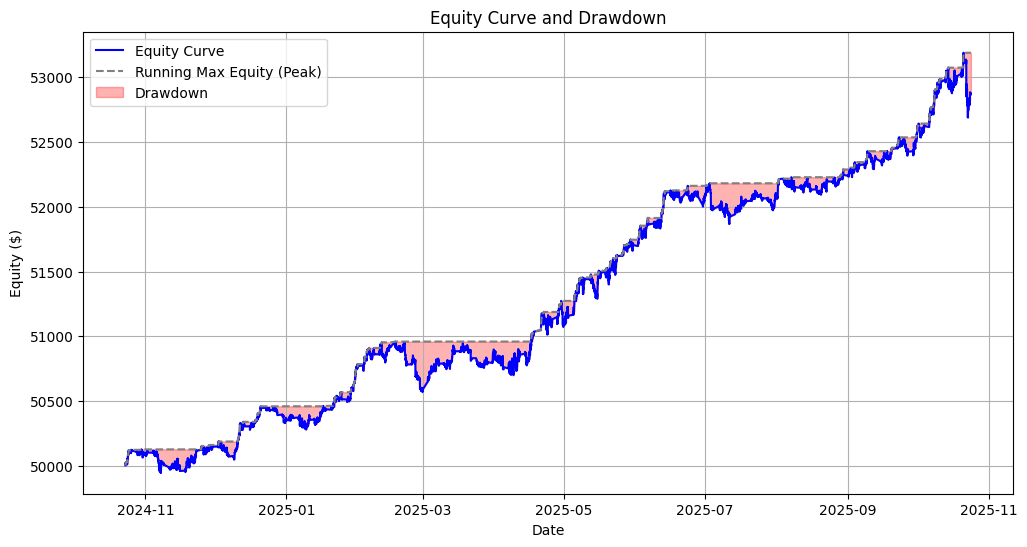

In [19]:
# --- Plot 1: Equity Curve ---
# This part requires the 'exits' DataFrame to have been fully built
plt.figure(figsize=(12, 6))
# FIX: Replaced DATE_COL with 'Date/Time'
plt.plot(exits['Date/Time'], exits['Equity'], label='Equity Curve', color='blue')
# FIX: Replaced DATE_COL with 'Date/Time'
plt.plot(exits['Date/Time'], exits['Running Max Equity'], label='Running Max Equity (Peak)', color='gray', linestyle='--')
# FIX: Replaced DATE_COL with 'Date/Time'
plt.fill_between(exits['Date/Time'], exits['Equity'], exits['Running Max Equity'], color='red', alpha=0.3, label='Drawdown')
plt.title('Equity Curve and Drawdown')
plt.xlabel('Date')
plt.ylabel('Equity ($)')
plt.legend()
plt.grid(True)
plt.show()

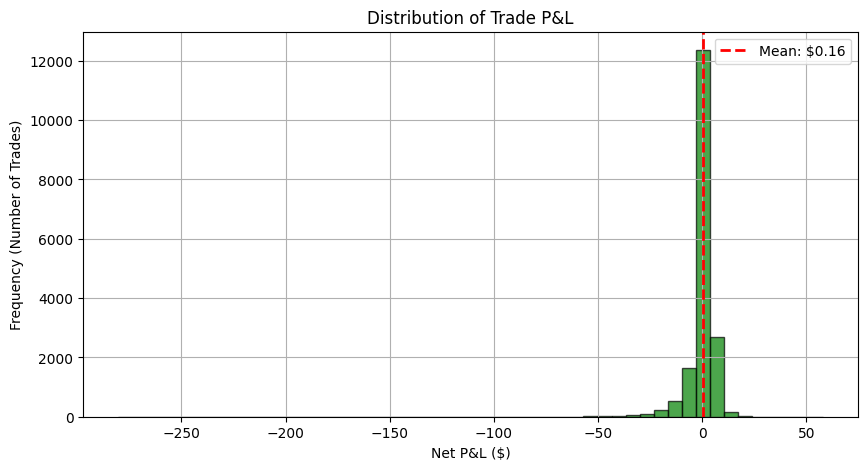

In [14]:
# --- Plot 2: P&L Histogram ---
# This part requires the 'trade_returns' Series (this was already correct)
plt.figure(figsize=(10, 5))
plt.hist(trade_returns, bins=50, edgecolor='black', color='green', alpha=0.7)
plt.axvline(trade_returns.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${trade_returns.mean():.2f}')
plt.title('Distribution of Trade P&L')
plt.xlabel('Net P&L ($)')
plt.ylabel('Frequency (Number of Trades)')
plt.legend()
plt.grid(True)
plt.show()

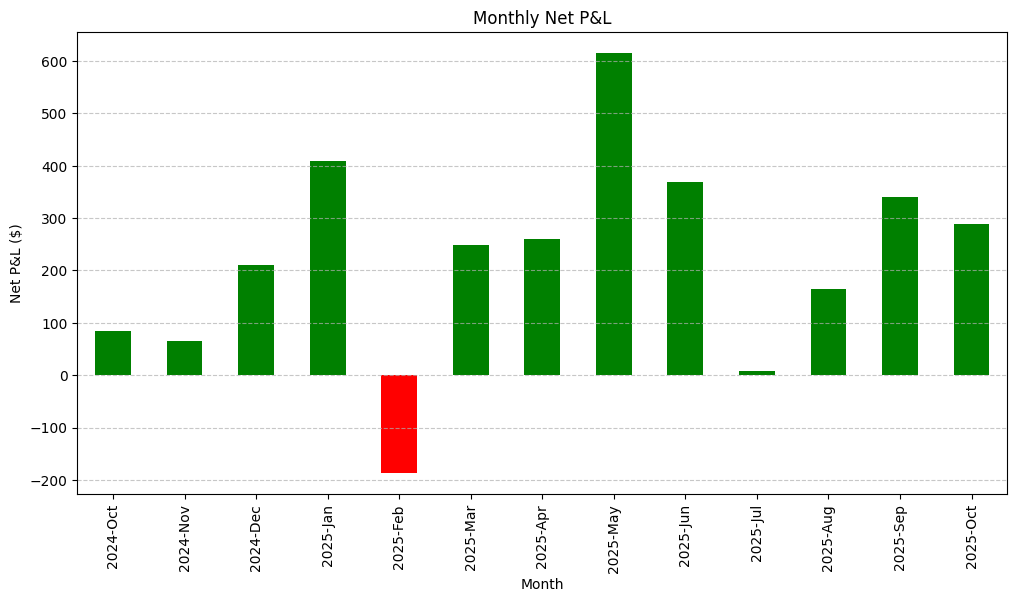

In [15]:

# --- Plot 3: Monthly P&L Bar Chart ---
# This part requires the 'exits' DataFrame
# FIX: Replaced DATE_COL and PNL_COL with 'Date/Time' and 'Net P&L USD'
monthly_pnl = exits.set_index('Date/Time')['Net P&L USD'].resample('M').sum()
monthly_pnl.index = monthly_pnl.index.strftime('%Y-%b')

plt.figure(figsize=(12, 6))
monthly_pnl.plot(kind='bar', color=(monthly_pnl > 0).map({True: 'g', False: 'r'}))
plt.title('Monthly Net P&L')
plt.xlabel('Month')
plt.ylabel('Net P&L ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()